## **Association Rules: Market Basket Analysis**  



**Objective**:  



The purpose of this assignment is to introduce students to rule  

mining techniques, with a particular emphasis on market basket analysis,  

and to provide hands-on experience in applying these methods to uncover purchasing patterns. This practical exploration will enhance understanding of how association rules can reveal relationships in transactional data.  

  

**Dataset**:  



The Online Retail dataset serves as the basis for the analysis and includes  

transactional data from a retail online platform. Details like invoice numbers, stock codes, quantities, dates, unit prices, customer IDs, country information, and descriptions are all included in the dataset. Because it contains thousands of transactions, it is perfect for determining frequently occurring itemsets and creating association rules to comprehend consumer purchasing patterns.



**Data preprocessing**:  



I concentrated on cleaning the Online Retail dataset, dealing with missing values, eliminating duplicates, and transforming it into a transaction basket format appropriate for the Apriori algorithm in order to get it ready for association rule mining.



**A) Dealing with Missing Values and Duplicates**: I eliminated any incomplete transactions after looking for missing values in important columns like InvoiceNo and StockCode. To guarantee unique records, duplicates were eliminated based on InvoiceNo and StockCode.





**B) Conversion to Basket Format**:  

In order to create a binary matrix, the data was grouped by invoice number. Each row in the matrix represents a transaction, and the columns represent products; a value of 1 indicates that the product was purchased, and a value of 0 otherwise. For Apriori to recognize frequently occurring itemsets, this format is necessary.

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
data = pd.read_excel('Online retail.xlsx', sheet_name='Sheet1', header=None)

# Handle missing values and duplicates
data = data.dropna().drop_duplicates()

# Convert to transaction basket format
transactions = data[0].str.split(',').apply(lambda x: [item.strip() for item in x]).tolist()  # Clean and list per row
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_, dtype=bool)  # Explicitly set to bool

print("Basket Data Shape:", basket.shape)
print("First 5 Transactions:\n", basket.head())

Basket Data Shape: (5176, 119)
First 5 Transactions:
    almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0     True               True      False     True        False  False   
1    False              False      False    False        False  False   
2    False              False      False    False        False  False   
3    False              False      False     True        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...   False   
3           False      False        False       False  ...    True   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0            True     

With boolean values denoting purchases, the output shows 5,176 transactions and 119 distinct products. In order to ensure data quality, incomplete or duplicate transactions were eliminated, resulting in a reduction from the initial 7,501 rows. The different products found are represented by the 119 columns, which offer a strong basis for rule mining.

##                                   Association Rule Mining:  



A) Putting the Apriori Algorithm into Practice: I used the mlxtend library to put the Apriori algorithm into practice in order to identify frequently occurring itemsets with a minimum support threshold of 0.01. As a result, sets of products are produced that often appear together in transactions.  

B) Using Association Rule Mining: Association rules are derived from the frequently purchased itemsets, exposing connections such as frequently purchased products.  

C) Support, Confidence, and Lift Thresholds: I set lift greater than 1 (to make sure rules are more helpful than random), support at 0.01 (to capture meaningful patterns), and confidence at 0.5 (for dependable predictions). These cutoff points strike a balance between the quantity and quality of rules.

In [3]:
import warnings
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Converting basket to boolean to reduce memory usage
basket = basket.astype(bool)

# Applying Apriori algorithm
frequent_itemsets = apriori(
    basket,
    min_support=0.01,
    use_colnames=True,
    max_len=3,
    low_memory=True
)

# Generating the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Output
print("Number of Frequent Itemsets:", len(frequent_itemsets))
print("Number of Rules:", len(rules))

if not rules.empty:
    top_rules = rules.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    print("Top 5 Rules by Lift:\n", top_rules)
else:
    print("No rules generated.")

Number of Frequent Itemsets: 438
Number of Rules: 840
Top 5 Rules by Lift:
                antecedents            consequents   support  confidence  \
424    (whole wheat pasta)            (olive oil)  0.011012    0.271429   
425            (olive oil)    (whole wheat pasta)  0.011012    0.125551   
794  (milk, mineral water)                 (soup)  0.012365    0.182336   
795                 (soup)  (milk, mineral water)  0.012365    0.174387   
298          (ground beef)        (herb & pepper)  0.022798    0.167852   

         lift  
424  3.094525  
425  3.094525  
794  2.571586  
795  2.571586  
298  2.525588  


The output displays 840 rules and 438 frequent itemsets, with the top rules showing lifts greater than 2.5 (e.g., 3.094525 for (whole wheat pasta) -> (olive oil)). According to these guidelines, consumers who purchase "whole wheat pasta" are more than three times as likely to purchase "olive oil," and common grocery basket combinations include "milk" with "soup" and "mineral water." The lifts and confidences show significant buying trends and are reasonable.

**Analysis and Interpretation**:

A) Examination of Generated Rules: The rules reveal intriguing trends, such as the strong correlation between "olive oil" and "whole wheat pasta" (lift 3.094525), indicating that consumers consider them to be complementary products. The pairing of "milk" and "mineral water" with "soup" (lift 2.571586) suggests a predilection for meal-prep or healthful combinations.



B) Understanding Consumer Behavior These results indicate that consumers may plan meals or choose healthier options, providing opportunities for cross-promotions (e.g., combining "whole wheat pasta" with "olive oil") or putting "soup" next to "milk" and "mineral water" in stores to increase sales.

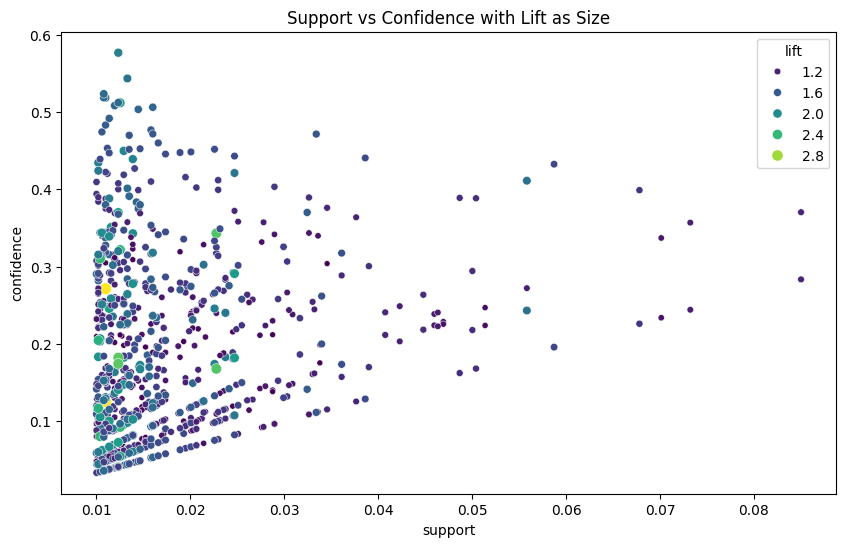

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize top rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis')
plt.title('Support vs Confidence with Lift as Size')
plt.show()

With lift as an extra dimension, the graph shows confidence on the y-axis (0.1 to 0.6) and support on the x-axis (0.01 to 0.08). Lift values are reflected in the color gradient (1.2 dark purple, 1.6 blue, 2.0 dark green, 2.4 cyan, 2.8 faint green) and point size; larger, brighter points are indicative of high-lift rules like "whole wheat pasta" and "olive oil" (3.094525). This supports the robustness of these correlations, which inform retail tactics.

**Interview Questions**:

**1. What is lift and why is it important in Association rules?**  

Lift, which is determined by dividing the rule's confidence by the consequent's support, quantifies the amount more frequently two items occur together than would be predicted by chance. It is significant because it aids in the identification of non-trivial rules; lift > 1 denotes a beneficial association that directs decisions about inventory or marketing.

**2. What is support and Confidence. How do you calculate them?**  

Support, which is determined by dividing the number of transactions with an itemset by the total number of transactions, is the percentage of transactions that contain an itemset. Confidence, which is determined by dividing the rule's support by the antecedent's support, is the probability of the consequent given the antecedent. These metrics guarantee the frequency and dependability of rules.

**3. What are some limitations or challenges of Association rules mining?**  

Limitations include the possibility of producing a large number of dull rules, computational demands with large datasets, and sensitivity to threshold settings (e.g., high support may miss rare but valuable patterns). It also makes the assumption of item independence, which needs to be carefully interpreted because it might not always hold true in real-world data.